<a href="https://colab.research.google.com/github/samarthGit2023/Image-Encryption/blob/main/ModEncryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image

def encrypt_image(original_path, key_path, output_path):
    # Load the original image and key image
    original_image = Image.open(original_path)
    key_image = Image.open(key_path)

    # Resize the key image to match the dimensions of the original image
    resized_key_image = key_image.resize(original_image.size)

    # Convert both images to grayscale
    original_gray = original_image.convert('L')
    key_gray = resized_key_image.convert('L')

    # Get the image size
    width, height = original_gray.size

    # Create a new grayscale image for encrypted pixels
    encrypted_image = Image.new('L', (width, height), color=128)

    # Apply encryption to each corresponding pixel
    for y in range(height):
        for x in range(width):
            # Get the grayscale values of the corresponding pixels in the original and key images
            original_value = original_gray.getpixel((x, y))
            key_value = key_gray.getpixel((x, y))

            # Multiply the grayscale values and take modulus by 256
            encrypted_pixel = (original_value * key_value) % 256

            # Update the encrypted pixel value in the new image
            encrypted_image.putpixel((x, y), encrypted_pixel)

    # Save the encrypted image
    encrypted_image.save(output_path)

    print("Image encrypted and saved successfully!")

# Path to the original image
original_image_path = 'madara.png'

# Path to the key image
key_image_path = 'keyimg2.png'

# Path to save the encrypted image
encrypted_image_path = 'encrypted_image.png'

# Encrypt the original image using the described process with the key image
encrypt_image(original_image_path, key_image_path, encrypted_image_path)




*   The above code can be used for image encryption. This encryption technique is based on **modular arithmetic technique.**
*  The provided code demonstrates an image encryption process using a key image in Python, utilizing the PIL library. The code aims to encrypt an original image using the **grayscale values of corresponding pixels** from a key image.

* A nested loop is used to iterate over each pixel of the original and key grayscale images. Within the loop, the grayscale values of the corresponding pixels in the original and key images are retrieved and multiplied, and the result is taken modulo 256 to ensure it remains within the valid grayscale value range.

* Thus we store the encrypted grayscale pixel values in encrypted_image.
* **encrypted_pixel** = (**original_value** * **key_value**) % 256
* This above technique is used o encrypt image pixels.



In [ ]:
from PIL import Image

def decrypt_image(key_path, encrypted_path, output_path):
    # Load the key image and encrypted image
    key_image = Image.open(key_path)
    encrypted_image = Image.open(encrypted_path)

    # Convert both images to grayscale
    key_gray = key_image.convert('L')
    encrypted_gray = encrypted_image.convert('L')

    # Get the image size
    width, height = key_gray.size

    # Create a new grayscale image for the decrypted pixels
    decrypted_image = Image.new('L', (width, height), color=128)

    # Apply decryption to each corresponding pixel
    for y in range(height):
        for x in range(width):
            # Get the grayscale values of the corresponding pixels in the key and encrypted images
            key_value = key_gray.getpixel((x, y))
            encrypted_value = encrypted_gray.getpixel((x, y))

            # Find the multiplicative inverse of the key value modulo 256
            inverse_key = multiplicative_inverse(key_value, 256)

            if inverse_key!=-1:
               decrypted_pixel = (encrypted_value * inverse_key) % 256


            # Update the decrypted pixel value in the new image
            decrypted_image.putpixel((x, y), decrypted_pixel)

    # decrypted_image.save(output_path)

    # for y in range(height):
    #     for x in range(width):
    #         # Get the grayscale values of the corresponding pixels in the key and encrypted images
    #         key_value = key_gray.getpixel((x, y))
    #         encrypted_value = encrypted_gray.getpixel((x, y))

    #         # Find the multiplicative inverse of the key value modulo 256
    #         inverse_key = multiplicative_inverse(key_value, 256)

    #         if inverse_key==-1:
    #            decrypted_pixel = calculate_average(x, y, decrypted_image)

    #         # Update the decrypted pixel value in the new image
    #         decrypted_image.putpixel((x, y), decrypted_pixel)

    # Save the decrypted image
    decrypted_image.save(output_path)

    print("Image decrypted and saved successfully!")


# Function to find the multiplicative inverse using extended Euclidean algorithm
def multiplicative_inverse(A, M):
    for X in range(1, M):
        if (((A % M) * (X % M)) % M == 1):
            return X
    return 1


# Function to calculate the greatest common divisor
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a


# Function to calculate the average of adjacent pixels
def calculate_average(x, y, image):
    adjacent_pixels = [
        image.getpixel((x - 1, y)),
        image.getpixel((x + 1, y)),
        image.getpixel((x, y - 1)),
        image.getpixel((x, y + 1))
    ]

    return sum(adjacent_pixels) // len(adjacent_pixels)


# Path to the key image
key_image_path = 'keyimg2.png'

# Path to the encrypted image
encrypted_image_path = 'encrypted_image.png'

# Path to save the decrypted image
decrypted_image_path = 'decrypted_image.png'

# Decrypt the encrypted image using the key image using the multiplicative inverse algorithm
decrypt_image(key_image_path, encrypted_image_path, decrypted_image_path)




*  We decrypt the image from the original image using the multiplicative inverse technique in modular arithmetic.
*   We find the multiplicative inverse(MI) of the key image pixel grayscale value and multiply the MI of key image to the encrypted image to get the decrypted image.
* The calculations for MI are shown below with the original, encrypted and decrypted images as output.



In [2]:
from google.colab import files
from IPython.display import Image


In [12]:
uploaded=files.upload()

Saving 20230624_141548.jpg to 20230624_141548.jpg


Original Image


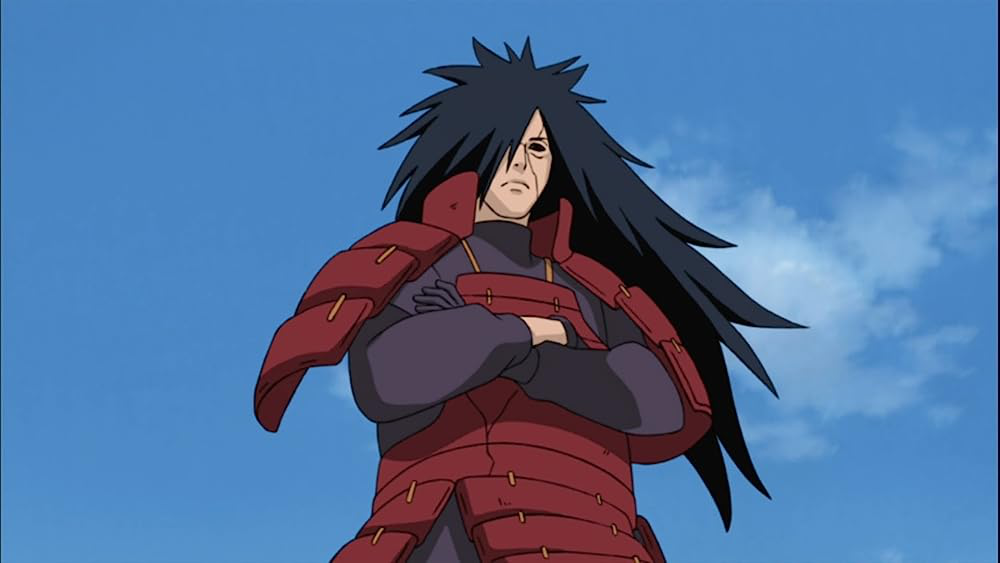

In [7]:
print("Original Image")
Image('madara (1).png', width=300)


Encrypted Image


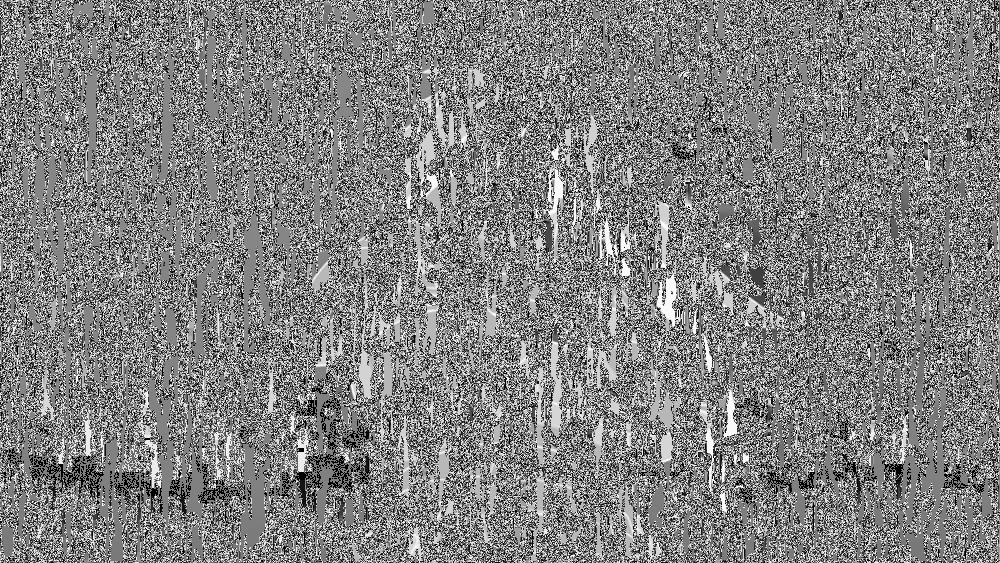

In [9]:
print("Encrypted Image")
Image('encrypted_image.png', width=300)

Original Image


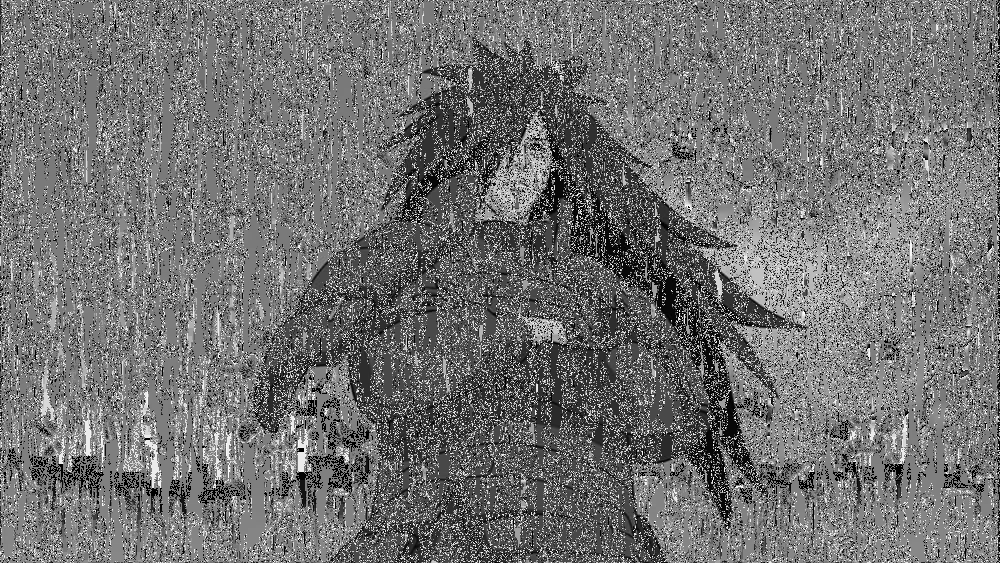

In [11]:
print("Original Image")
Image('decrypted_image.png', width=300)

Original Image


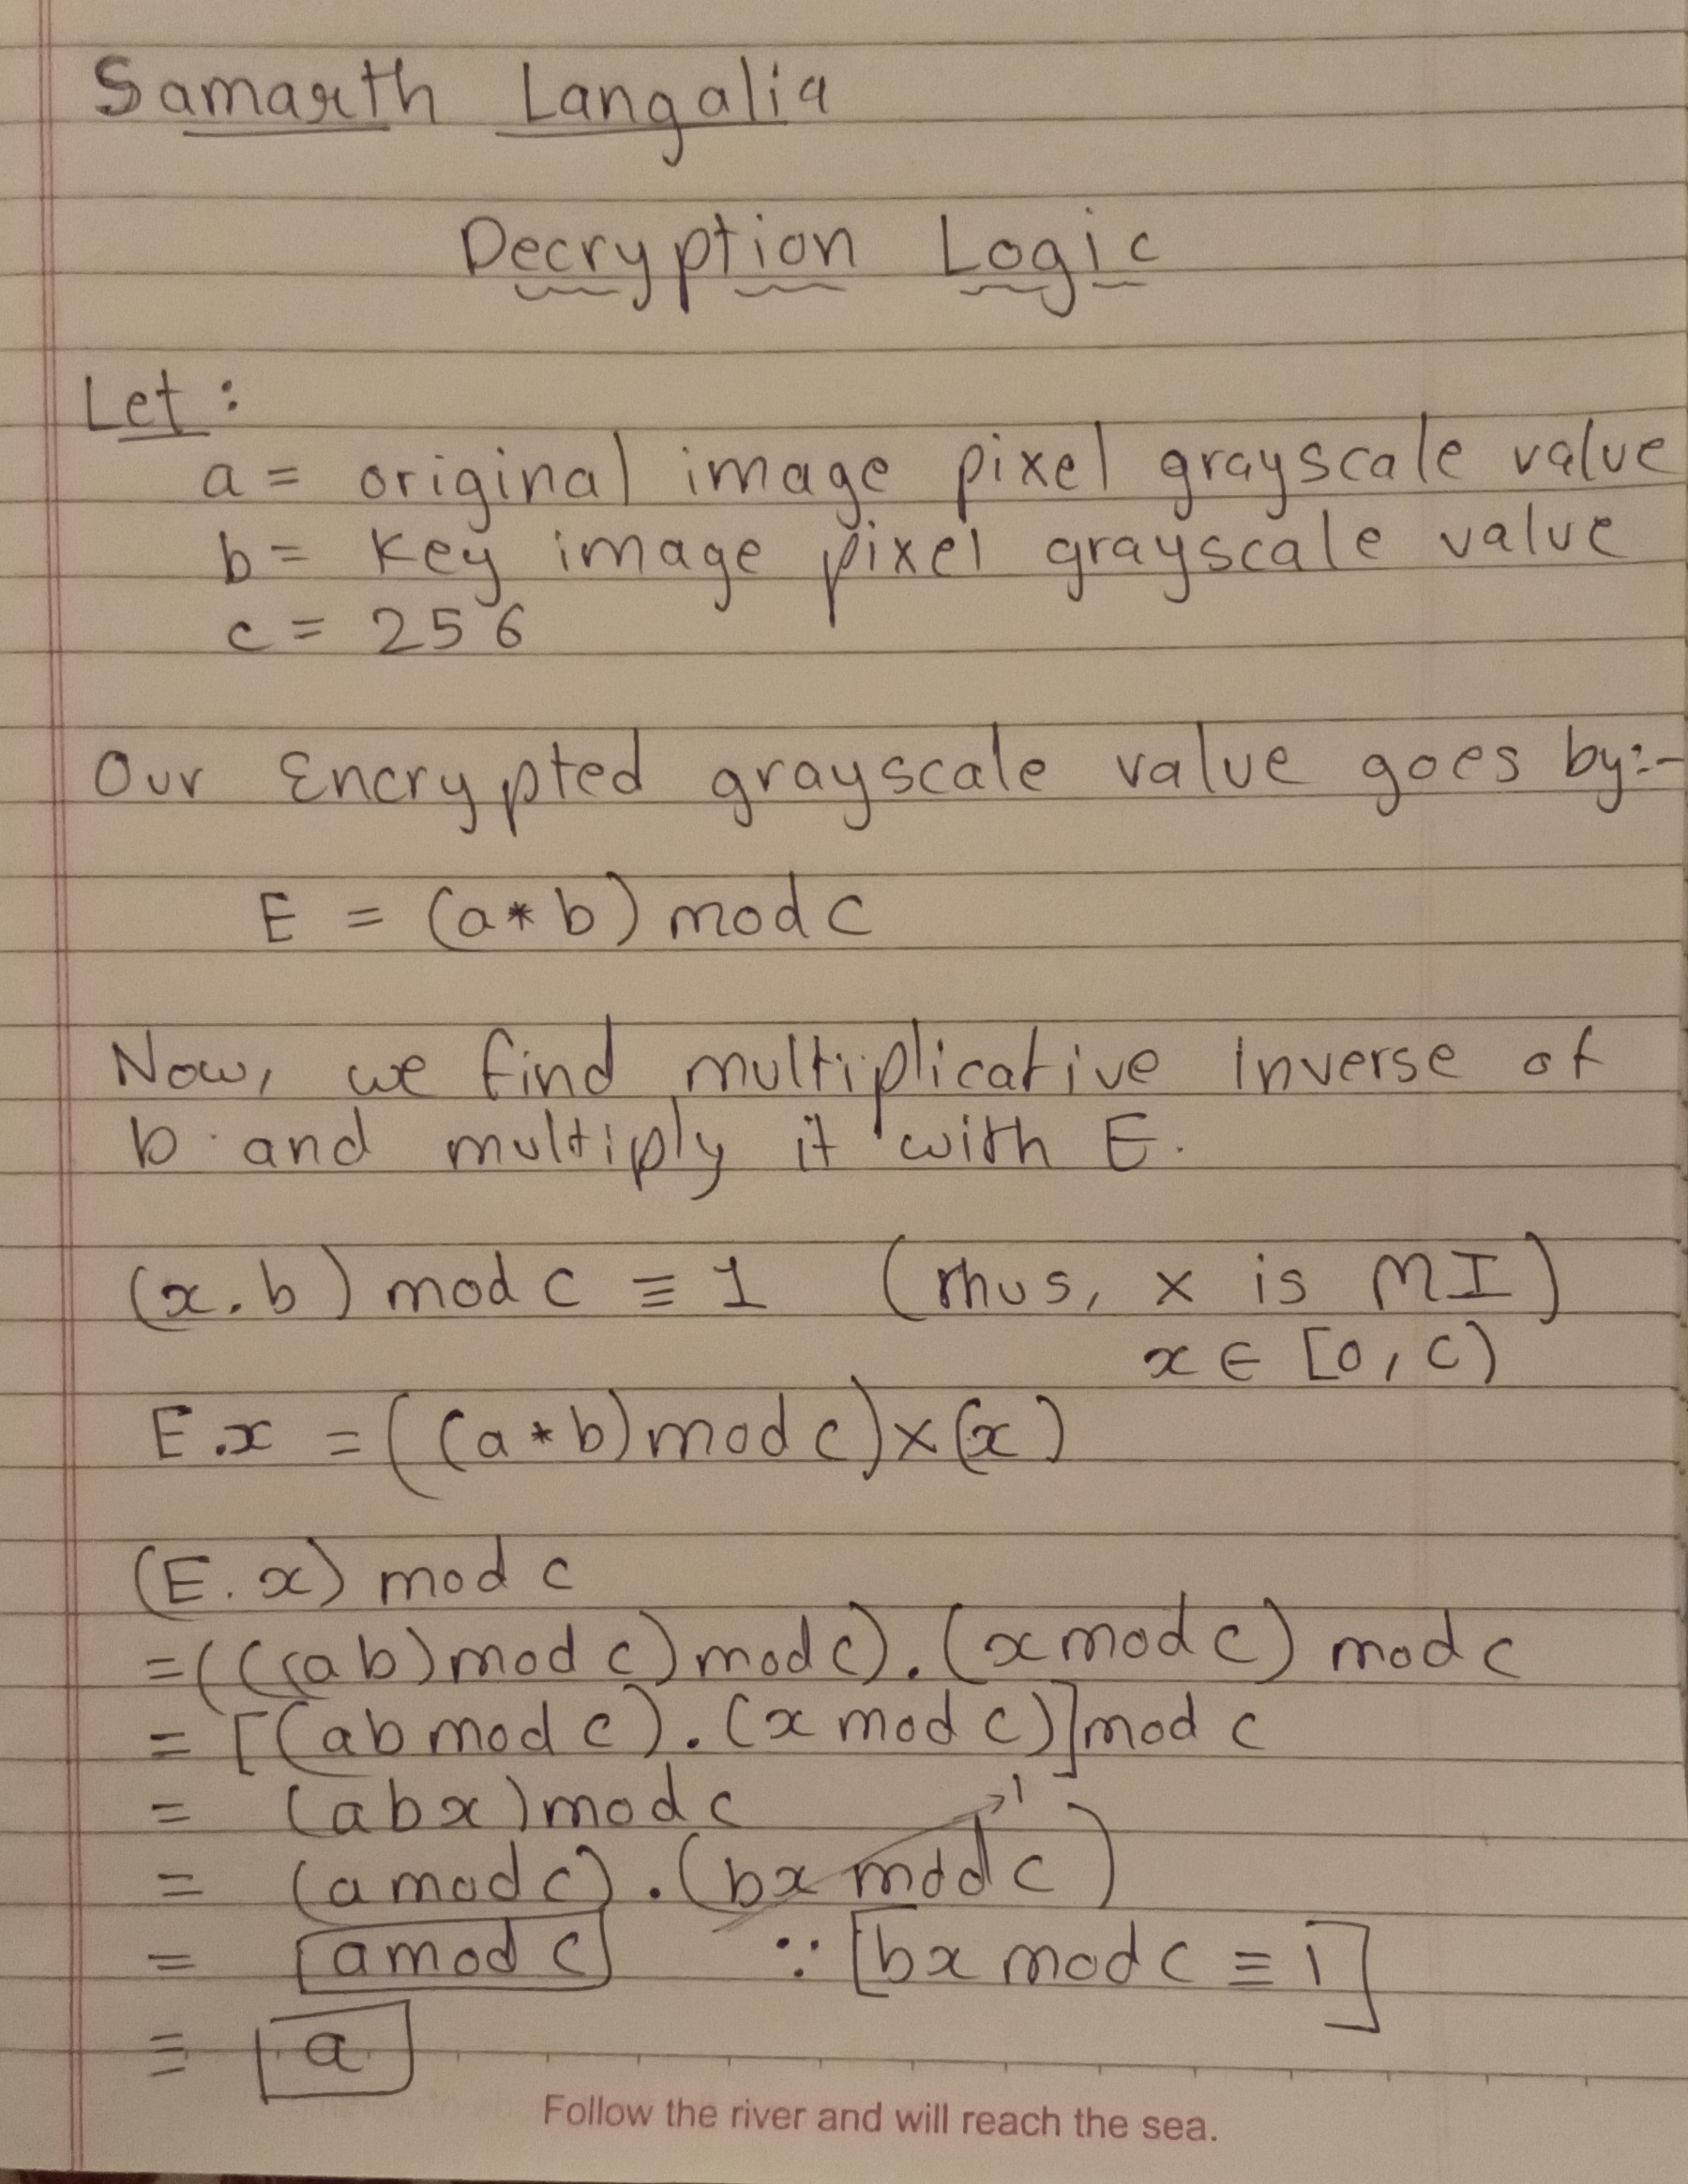

In [13]:
print("Original Image")
Image('20230624_141548.jpg', width=300)